## Scraping from Reddit with Reddit API

In [ ]:
!pip install praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 188 kB 7.5 MB/s 
     |████████████████████████████████| 55 kB 3.8 MB/s 


In [ ]:
import praw
import pandas as pd

user_agent = "Resddit Scraper by /u/tobbydah"
reddit = praw.Reddit(
    client_id = "xxxxxxxx",
    client_secret = "xxxxxxxxxxxx",
    user_agent = user_agent
)

In [ ]:
# hot new rising top
import pandas as pd
headlines = []

# Scraping subreddit for Autism
for submission in reddit.subreddit('autism').hot(limit=None):
    headlines.append([submission.title, submission.score, submission.id, submission.author, submission.subreddit, 
                      submission.url, submission.num_comments, submission.selftext, submission.created, submission.created_utc])

autism_df = pd.DataFrame(headlines, 
                         columns=['title', 'score', 'id', 'author', 'subreddit', 'url', 'num_comments', 'body', 'created', 'created_utc'])

# Scraping subreddit for Depression
for submission in reddit.subreddit('depression').hot(limit=None):
    headlines.append([submission.title, submission.score, submission.id, submission.author, submission.subreddit, 
                      submission.url, submission.num_comments, submission.selftext, submission.created, submission.created_utc])

depression_df = pd.DataFrame(headlines, 
                         columns=['title', 'score', 'id', 'author', 'subreddit', 'url', 'num_comments', 'body', 'created', 'created_utc'])

# Scraping subreddit for ADHD
for submission in reddit.subreddit('ADHD').hot(limit=None):
    headlines.append([submission.title, submission.score, submission.id, submission.author, submission.subreddit, 
                      submission.url, submission.num_comments, submission.selftext, submission.created, submission.created_utc])

adhd_df = pd.DataFrame(headlines, 
                         columns=['title', 'score', 'id', 'author', 'subreddit', 'url', 'num_comments', 'body', 'created', 'created_utc'])

# Scraping subreddit for Anxiety
for submission in reddit.subreddit('anxiety').hot(limit=None):
    headlines.append([submission.title, submission.score, submission.id, submission.author, submission.subreddit, 
                      submission.url, submission.num_comments, submission.selftext, submission.created, submission.created_utc])

anxiety_df = pd.DataFrame(headlines, 
                         columns=['title', 'score', 'id', 'author', 'subreddit', 'url', 'num_comments', 'body', 'created', 'created_utc'])


#Joining the four subreddits and saving data to a single CSV
mental_health_categories = pd.concat([autism_df, adhd_df, anxiety_df, depression_df])
#mental_health_categories.to_csv('C:/Users/USER/Downloads/Data Science/MindSum/Reddit Dataset/mental_health_categories_new4.csv', header=True, encoding='utf-8', index=False)

#print(len(headlines))

In [ ]:
mental_health_categories

,title,score,id,author,subreddit,url,num_comments,body,created,created_utc
0,Let’s talk about ABA therapy. ABA posts outsid...,740,ub3skp,cakeisatruth,autism,https://www.reddit.com/r/autism/comments/ub3sk...,1106,ABA (Applied Behavior Analysis) therapy is one...,1.650833e+09,1.650833e+09
1,Same Food Saturdays !,14,xgfgbg,sybersonic,autism,https://www.reddit.com/r/autism/comments/xgfgb...,18,Most of us consistency love consistency. Shar...,1.663398e+09,1.663398e+09
2,"What foods are like this to you guys? To me, i...",1654,xgrgte,Dimentiorules,autism,https://i.redd.it/enzbkhes7go91.jpg,476,,1.663433e+09,1.663433e+09
3,Got to a point where the walls were shaking fr...,760,xgxevr,jwin1211,autism,https://i.redd.it/qa4pljsufho91.jpg,101,,1.663448e+09,1.663448e+09
4,masking meme,113,xh2hz6,RestlessMind95,autism,https://i.redd.it/pju3zwq6kio91.jpg,3,,1.663462e+09,1.663462e+09
...,...,...,...,...,...,...,...,...,...,...
1957,life is an everyday struggle,1,xe07a1,_Ithri_,depression,https://www.reddit.com/r/depression/comments/x...,1,"Hey all, just wanted to share a bit what I'm g...",1.663157e+09,1.663157e+09
1958,very depressed,1,xe05x5,OkBuilder8671,depression,https://www.reddit.com/r/depression/comments/x...,0,Hello guys I wish to die tonight. \nThis life ...,1.663157e+09,1.663157e+09
1959,How to cry,1,xdzvx1,applirium,depression,https://www.reddit.com/r/depression/comments/x...,0,"I am asking for help, want to cry but i cannot...",1.663156e+09,1.663156e+09
1960,"aw shit, here we go again",1,xdzp3n,scream-in-thevoid,depression,https://www.reddit.com/r/depression/comments/x...,0,wish I had one day I could wake up and not hav...,1.663156e+09,1.663156e+09


In [ ]:
# mental_health_categories['pattern_match'] = mental_health_categories['body'].str.contains('rest of it being useless')
# mental_health_categories

# Searching using specific key words indicating a post has a form of mental health condition according to insight taken from
# mental health symptoms specified in ICD-11 document

recent_diagnosis = mental_health_categories[mental_health_categories['body'].str.contains('recently diagnosed')==True]
tired_of_life = mental_health_categories[mental_health_categories['body'].str.contains('tired of life')==True]
kill_myself = mental_health_categories[mental_health_categories['body'].str.contains('will kill myself')==True]
depressed = mental_health_categories[mental_health_categories['body'].str.contains('am depressed')==True]
meaningless_life = mental_health_categories[mental_health_categories['body'].str.contains(r'life is meaningless')==True]
feeling_sad = mental_health_categories[mental_health_categories['body'].str.contains(r'feeling sad')==True]
guilty = mental_health_categories[mental_health_categories['body'].str.contains(r'feel guilty')==True]
confused = mental_health_categories[mental_health_categories['body'].str.contains(r'am confused')==True]
cannot_sleep = mental_health_categories[mental_health_categories['body'].str.contains(r"can't sleep")==True]
cannot_understand = mental_health_categories[mental_health_categories['body'].str.contains(r"can't understand")==True]
worthless = mental_health_categories[mental_health_categories['body'].str.contains(r"worthless")==True]
traumatized = mental_health_categories[mental_health_categories['body'].str.contains(r"traumatized")==True]
worry = mental_health_categories[mental_health_categories['body'].str.contains(r"worried")==True]
anxious = mental_health_categories[mental_health_categories['body'].str.contains(r"anxious")==True]
ashamed = mental_health_categories[mental_health_categories['body'].str.contains(r"ashamed")==True]
mental_breakdown = mental_health_categories[mental_health_categories['body'].str.contains(r"mental breakdown")==True]
lonely = mental_health_categories[mental_health_categories['body'].str.contains(r"lonely")==True]
hate_myself = mental_health_categories[mental_health_categories['body'].str.contains(r"I hate myself")==True]
dont_know_want = mental_health_categories[mental_health_categories['body'].str.contains(r"don’t know what I want")==True]
dont_know = mental_health_categories[mental_health_categories['body'].str.contains(r"I don’t know")==True]
dont_have = mental_health_categories[mental_health_categories['body'].str.contains(r"I don’t have")==True]
weird = mental_health_categories[mental_health_categories['body'].str.contains(r"weird")==True]
dont_have_friends = mental_health_categories[mental_health_categories['body'].str.contains(r"i dont have any friends")==True]
feel_like = mental_health_categories[mental_health_categories['body'].str.contains(r"i feel like")==True]

mhsu = pd.concat([recent_diagnosis, tired_of_life, kill_myself, depressed, meaningless_life, feeling_sad, guilty, \
                  confused, cannot_sleep, cannot_understand, worthless, traumatized, worry, anxious, ashamed, \
                 mental_breakdown, lonely, hate_myself, dont_know_want, dont_know, dont_have, weird, dont_have_friends, \
                 feel_like])
mhsu.to_csv('C:/Users/USER/Downloads/Data Science/MindSum/Reddit Dataset/mhsu_new.csv', header=True, encoding='utf-8', index=False)
mhsu

### Scraping for individual user posts



In [ ]:
all_autism = mhsu[mhsu['subreddit']=='autism'].author.astype(str).tolist()
all_autism = list(dict.fromkeys(all_autism))
print('Total Autism post is {}' .format(len(all_autism)))

all_depression = mhsu[mhsu['subreddit']=='depression'].author.astype(str).tolist()
all_depression = list(dict.fromkeys(all_depression))
print('Total Depression post is {}' .format(len(all_depression)))

all_adhd = mhsu[mhsu['subreddit']=='ADHD'].author.astype(str).tolist()
all_adhd = list(dict.fromkeys(all_adhd))
print('Total ADHD post is {}' .format(len(all_adhd)))

all_Anxiety = mhsu[mhsu['subreddit']=='Anxiety'].author.astype(str).tolist()
all_Anxiety = list(dict.fromkeys(all_Anxiety))
print('Total Anxiety post is {}' .format(len(all_Anxiety)))

In [ ]:
#author=(mental_health_categories.author)[:1] ##["whzy0i", "ub3skp"]
#author = ['Effective-Bridge8937']
#author = mhsu['author'].astype(str).tolist()
author = all_Anxiety

i = []
for authors in author:
    try:
        submission = reddit.redditor(authors).submissions.hot(limit=None) # Note: cannot pull more than 1000 at a time
        for column in submission:
            i.append([column.title, column.id, column.subreddit, column.selftext, column.author, column.created])
    except:
        pass
su = pd.DataFrame(i, columns=['title', 'id', 'subreddit', 'selftext', 'author', 'created'])

#su.to_csv('C:/Users/USER/Downloads/Data Science/MindSum/Reddit Dataset/mhsu_single_users_total.csv', header=True, encoding='utf-8', index=False)
su.to_csv('C:/Users/USER/Downloads/Data Science/MindSum/Reddit Dataset/all_Anxiety.csv', header=True, encoding='utf-8', index=False)

In [ ]:
### Joining the four single-user categories together

autism_posts = pd.read_csv('C:/Users/USER/Downloads/Data Science/MindSum/Reddit Dataset/all_autism.csv')
depression_posts = pd.read_csv('C:/Users/USER/Downloads/Data Science/MindSum/Reddit Dataset/all_depression.csv')
adhd_posts = pd.read_csv('C:/Users/USER/Downloads/Data Science/MindSum/Reddit Dataset/all_adhd.csv')
anxiety_posts = pd.read_csv('C:/Users/USER/Downloads/Data Science/MindSum/Reddit Dataset/all_Anxiety.csv')

autism_posts['label'] = 'autism'
depression_posts['label'] = 'depression'
adhd_posts['label'] = 'ADHD'
anxiety_posts['label'] = 'anxiety'

mhsu_total = pd.concat([autism_posts, depression_posts, adhd_posts, anxiety_posts])
mhsu_total.to_csv('C:/Users/USER/Downloads/Data Science/MindSum/Reddit Dataset/mhsu_total.csv', header=True, encoding='utf-8', index=False)

## Importing Libraries

In [ ]:
%matplotlib inline
import re
import string
import nltk
nltk.download('stopwords')
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score, roc_auc_score, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
stopwords = nltk.corpus.stopwords.words('english')
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import pandas as pd
mhsu = pd.read_csv('/content/drive/MyDrive/Mindsum/mhsu_total.csv')
mhsu

,title,id,subreddit,selftext,author,created,label
0,What to do?,wxut1r,autism,My partner’s kid just recently has been diagno...,Noradd_123,1.661475e+09,autism
1,ASUS - ROUTER - GT-5300 ROG - AIMesh?,vbluyd,ASUS,"Hey all, I've had This router for a while now,...",Noradd_123,1.655153e+09,autism
2,Why does Defillama not consider Milkomeda a Ca...,ttavji,cardano,Just thought it was weird?\n\nI'm simply curio...,Noradd_123,1.648764e+09,autism
3,COTI vs DJED vs SHEN vs ADA - Can anyone ELI5 ...,tq8x2w,cardano,Hey All\n\nI'm trying to understand the relati...,Noradd_123,1.648473e+09,autism
4,Inquiry: Cold Climate,tpr09q,Kombucha,Hey All - I'm trying to figure out if it is wo...,Noradd_123,1.648409e+09,autism
...,...,...,...,...,...,...,...
48274,struggling a lot with health anxiety,v3ula0,Anxiety,"i used to be doing okay, but ever since I had ...",justarandomaccountyk,1.654244e+09,anxiety
48275,feel like i don't take in enough air,v1pj9k,medical,For the past few days I (F16) have been feelin...,justarandomaccountyk,1.654001e+09,anxiety
48276,anxiety is ruining my social life and taking a...,wvdk04,Anxiety,i've had anxiety my whole life. i used to go t...,Main_Text9632,1.661224e+09,anxiety
48277,tips for cleaning self?,wlklp5,TheGirlSurvivalGuide,[removed],Main_Text9632,1.660200e+09,anxiety


In [ ]:
mhsu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48279 entries, 0 to 48278
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      48279 non-null  object 
 1   id         48279 non-null  object 
 2   subreddit  48279 non-null  object 
 3   selftext   33062 non-null  object 
 4   author     48279 non-null  object 
 5   created    48279 non-null  float64
 6   label      48279 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.6+ MB


In [ ]:
mhsu.label.value_counts()

anxiety       20443
autism         9946
depression     9675
ADHD           8215
Name: label, dtype: int64

In [ ]:
# Checking for duplicates across rows
mhsu[mhsu.duplicated()].count()

title        0
id           0
subreddit    0
selftext     0
author       0
created      0
label        0
dtype: int64

In [ ]:
# Merging the title text to the post

#mhsu['text'] = mhsu['title'].astype(str) + ' ' + mhsu['selftext'].astype(str)
mhsu = mhsu[['label', 'selftext']]
mhsu

,label,selftext
0,autism,My partner’s kid just recently has been diagno...
1,autism,"Hey all, I've had This router for a while now,..."
2,autism,Just thought it was weird?\n\nI'm simply curio...
3,autism,Hey All\n\nI'm trying to understand the relati...
4,autism,Hey All - I'm trying to figure out if it is wo...
...,...,...
48274,anxiety,"i used to be doing okay, but ever since I had ..."
48275,anxiety,For the past few days I (F16) have been feelin...
48276,anxiety,i've had anxiety my whole life. i used to go t...
48277,anxiety,[removed]


In [ ]:
print ('Number of missing values in label: {}'. format(mhsu.label.isnull().sum()))
print ('Number of missing values in body: {}'. format(mhsu.selftext.isnull().sum()))

Number of missing values in label: 0
Number of missing values in body: 15217


In [ ]:
mhsu = mhsu.dropna()
mhsu = mhsu[mhsu.selftext!='[removed]']

In [ ]:
mhsu.label.value_counts()

anxiety       13604
depression     5871
ADHD           4903
autism         4502
Name: label, dtype: int64

Text(0.5, 0, 'Categories Type')

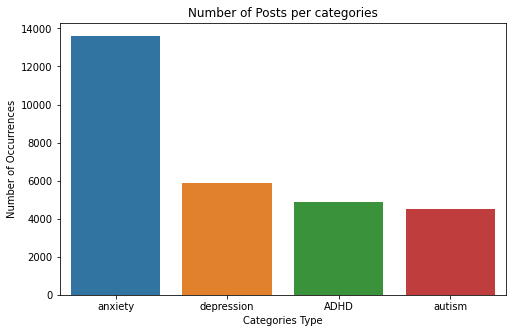

In [ ]:
rowsums = mhsu.iloc[:,:1].sum(axis=1)
x = rowsums.value_counts()

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
ax = sns.barplot(x.index, x.values)
plt.title("Number of Posts per categories")
plt.ylabel('Number of Occurrences')
plt.xlabel('Categories Type')

In [ ]:
# Dealing with class imbalance by upsampling and downsampling the dataset
from sklearn.utils import resample

Anxiety_to_scale = mhsu[mhsu.label=='anxiety']
ADHD_to_scale = mhsu[mhsu.label=='ADHD']
Depression_to_scale = mhsu[mhsu.label=='depression']
Autism_to_scale = mhsu[mhsu.label=='autism']
# to upscale Anxiety class
Anxiety_scaled = resample(Anxiety_to_scale,
                            replace=False,     # sample with replacement
                            n_samples=4500,    # to match majority class
                            random_state=1234) # reproducible results
 
# to upscale ADHD class
ADHD_scaled = resample(ADHD_to_scale,
                         replace=False,     # sample with replacement
                         n_samples=4500,    # to match majority class
                         random_state=1235) # reproducible results
 
# to upscale Depression class
Depression_scaled = resample(Depression_to_scale, 
                                 replace=False,     # sample with replacement
                                 n_samples=4500,    # to match majority class
                                 random_state=1236) # reproducible results
 
# to upscale Autism class
Autism_scaled = resample(Autism_to_scale, 
                                 replace=False,     # sample with replacement
                                 n_samples=4500,    # to match majority class
                                 random_state=12345) # reproducible results
 
# Combine majority class with upsampled minority class
mhsu_balanced = pd.concat([Anxiety_scaled, ADHD_scaled, Depression_scaled, Autism_scaled])


mhsu_balanced.label.value_counts()

anxiety       4500
ADHD          4500
depression    4500
autism        4500
Name: label, dtype: int64

Text(0.5, 0, 'Categories Type')

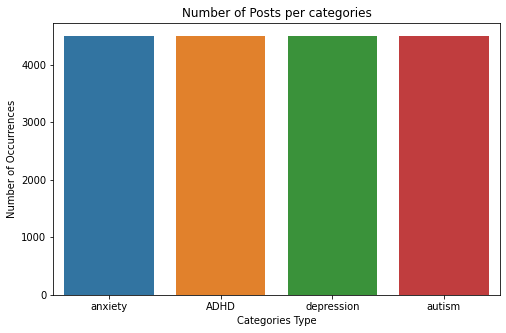

In [ ]:
rowsums = mhsu_balanced.iloc[:,:1].sum(axis=1)
x = rowsums.value_counts()

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
ax = sns.barplot(x.index, x.values)
plt.title("Number of Posts per categories")
plt.ylabel('Number of Occurrences')
plt.xlabel('Categories Type')

In [ ]:
mhsu_balanced['text_len'] = mhsu_balanced['selftext'].apply(lambda x: len(x))
mhsu_balanced

,label,selftext,text_len
31579,anxiety,Been trying to join some discord servers to ma...,928
32895,anxiety,I can’t stop worrying about it and thinking I ...,206
44954,anxiety,I may have gerd lol. Imma see,29
39341,anxiety,I want to break no contact. I have this naggin...,700
39009,anxiety,\ni’m in grad school now. but i went through 4...,1112
...,...,...,...
7650,autism,"I'll go first, proctor ingram, Whitechapel Cha...",82
9889,autism,i developed a fucking eating disorder im so fu...,106
9266,autism,Hey so this may be a dumb question but I all o...,290
7880,autism,This will literally fucking kill me. I’ve gott...,369


In [ ]:
import string
def punct_count(text):
    count = sum([1 for punct in text if punct in string.punctuation])
    return 100*count/len(text)
mhsu_balanced['punct'] = mhsu_balanced['selftext'].apply(lambda x: punct_count(x))
mhsu_balanced

,label,selftext,text_len,punct
31579,anxiety,Been trying to join some discord servers to ma...,928,3.232759
32895,anxiety,I can’t stop worrying about it and thinking I ...,206,0.970874
44954,anxiety,I may have gerd lol. Imma see,29,3.448276
39341,anxiety,I want to break no contact. I have this naggin...,700,2.000000
39009,anxiety,\ni’m in grad school now. but i went through 4...,1112,2.338129
...,...,...,...,...
7650,autism,"I'll go first, proctor ingram, Whitechapel Cha...",82,7.317073
9889,autism,i developed a fucking eating disorder im so fu...,106,0.000000
9266,autism,Hey so this may be a dumb question but I all o...,290,1.379310
7880,autism,This will literally fucking kill me. I’ve gott...,369,2.439024


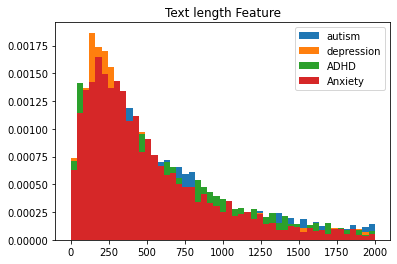

In [ ]:
# Evaluating the text length feature

bins = np.linspace(0, 2000, 50)
plt.hist(mhsu_balanced[mhsu_balanced['label'] == 'autism']['text_len'], bins, label='autism', density=True, stacked=True)
plt.hist(mhsu_balanced[mhsu_balanced['label'] == 'depression']['text_len'], bins, label='depression', density=True, stacked=True)
plt.hist(mhsu_balanced[mhsu_balanced['label'] == 'ADHD']['text_len'], bins, label='ADHD', density=True, stacked=True)
plt.hist(mhsu_balanced[mhsu_balanced['label'] == 'anxiety']['text_len'], bins, label='Anxiety', density=True, stacked=True)
plt.legend(loc='upper right')
plt.title('Text length Feature')
plt.show()

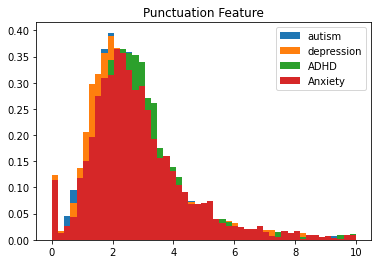

In [ ]:
# Evaluating puctuation feature

bins = np.linspace(0, 10)
plt.hist(mhsu_balanced[mhsu_balanced['label'] == 'autism']['punct'], bins, label='autism', density=True, stacked=True)
plt.hist(mhsu_balanced[mhsu_balanced['label'] == 'depression']['punct'], bins, label='depression', density=True, stacked=True)
plt.hist(mhsu_balanced[mhsu_balanced['label'] == 'ADHD']['punct'], bins, label='ADHD', density=True, stacked=True)
plt.hist(mhsu_balanced[mhsu_balanced['label'] == 'anxiety']['punct'], bins, label='Anxiety', density=True, stacked=True)
plt.legend(loc='upper right')
plt.title('Punctuation Feature')
plt.show()

In [ ]:
# Text Length plot

bins = np.linspace(0, 2000, 50)
plt.hist(mhsu_balanced['text_len'], bins)
plt.title('Total Text length')
plt.show()

In [ ]:
for i in [2,3,4,5]:
    plt.hist((mhsu_balanced['text_len'])**(1/i), bins=50)
    plt.title(f'Transform = 1/{i}')
    plt.show()

In [ ]:
mhsu_balanced

,label,selftext,text_len,punct
31579,anxiety,Been trying to join some discord servers to ma...,928,3.232759
32895,anxiety,I can’t stop worrying about it and thinking I ...,206,0.970874
44954,anxiety,I may have gerd lol. Imma see,29,3.448276
39341,anxiety,I want to break no contact. I have this naggin...,700,2.000000
39009,anxiety,\ni’m in grad school now. but i went through 4...,1112,2.338129
...,...,...,...,...
7650,autism,"I'll go first, proctor ingram, Whitechapel Cha...",82,7.317073
9889,autism,i developed a fucking eating disorder im so fu...,106,0.000000
9266,autism,Hey so this may be a dumb question but I all o...,290,1.379310
7880,autism,This will literally fucking kill me. I’ve gott...,369,2.439024


In [ ]:
stop_words = set(stopwords) - set(['not', "don't", "didn't", "hadn't", "hasn't", "haven't", "won't", "wouldn't" ])
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    sentence = text.replace(r"http\S+", "")
    sentence = sentence.replace(r'^https?:\/\/.*[\r\n]*', '')
    sentence = sentence.replace(r"https\S+", "")
    sentence = sentence.replace(r"http", "")
    sentence = sentence.replace(r"https", "")
    tokens = re.split('\W+', sentence)
    text = [word for word in tokens if word not in stop_words]
    text = [word for word in text if word.isalpha()]
    text = " ".join(text)
    return text

In [ ]:
mhsu_balanced['clean_text'] = mhsu_balanced['selftext'].map(lambda x : clean_text(x))
mhsu_balanced

,label,selftext,clean_text
31579,anxiety,Been trying to join some discord servers to ma...,trying join discord servers make new friends u...
32895,anxiety,I can’t stop worrying about it and thinking I ...,stop worrying thinking severe health anxiety o...
44954,anxiety,I may have gerd lol. Imma see,may gerd lol imma see
39341,anxiety,I want to break no contact. I have this naggin...,want break contact nagging urge write text mes...
39009,anxiety,\ni’m in grad school now. but i went through 4...,grad school went years college never made clos...
...,...,...,...
7650,autism,"I'll go first, proctor ingram, Whitechapel Cha...",ill go first proctor ingram whitechapel charli...
9889,autism,i developed a fucking eating disorder im so fu...,developed fucking eating disorder im fucking t...
9266,autism,Hey so this may be a dumb question but I all o...,hey may dumb question sudden got really itchy ...
7880,autism,This will literally fucking kill me. I’ve gott...,literally fucking kill gotten circle friends e...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

#tokenized_text = tfidf_vect.get_feature_names()

def get_toptext_ngrams(corpus, ngrams=(1, 1), nr=None):
    """
    creates a bag of ngrams and counts ngram frequency.

    Returns a list of tuples: (ngram, count)
    """
    vec = CountVectorizer(ngram_range=ngrams, stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:nr]

In [ ]:
top_text_ngrams = get_toptext_ngrams(mhsu_balanced.clean_text, ngrams=(3, 3), nr=10)
print(top_text_ngrams)

[('feel like im', 277), ('dont know im', 76), ('dont feel like', 70), ('im pretty sure', 68), ('long story short', 66), ('dont really know', 58), ('makes feel like', 57), ('feel like shit', 49), ('like feel like', 48), ('feel like going', 47)]


Text(0.5, 1.0, 'Distribution of Top-10 Tri-gram in the corpus')

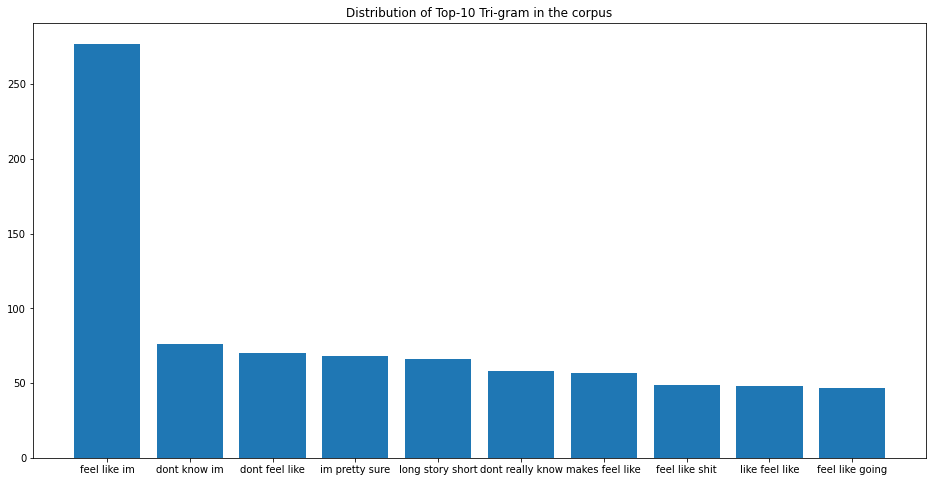

In [ ]:
x, y = zip(*top_text_ngrams)
plt.figure(1, figsize=(16, 8))
plt.subplot(1, 1, 1)
plt.bar(x, y)
plt.title('Distribution of Top-10 Tri-gram in the corpus')

In [ ]:
ngram_vect = TfidfVectorizer(ngram_range=(3,3), min_df = 3, stop_words = 'english')
ngram_doc = ngram_vect.fit_transform(mhsu_balanced['clean_text'])
print(ngram_doc.shape)
print(ngram_vect.get_feature_names())

(18000, 10672)
['abandoned disappointed fall', 'abdominal pain pelvic', 'able afford nice', 'able feel bed', 'able health issues', 'able hear purr', 'able live dignity', 'able live life', 'able make friends', 'able make money', 'able overcome similar', 'able pay attention', 'able play game', 'able really poop', 'able say goodbye', 'able stop ruminating', 'able struggles fact', 'able swallow food', 'able transition selfemployment', 'abnorm irregular period', 'abnormal colours cause', 'abnormal smear years', 'absences adhere laws', 'absolutely shook came', 'absolutely social medical', 'absolutely terrible years', 'absolutely worth overtime', 'abuse issues insomnia', 'abused years multiple', 'abusive person fuck', 'academic future really', 'academically failing multiple', 'academically prime socially', 'academically staying strong', 'accent meaning hard', 'accent talk quite', 'accept supportive non', 'accepted bid wire', 'access garden said', 'accessory parotid gland', 'accommodations ok 

In [ ]:
Ng_features = pd.DataFrame(ngram_doc.toarray())
Ng_features.head()

,0,1,2,3,4,5,6,7,8,9,...,10662,10663,10664,10665,10666,10667,10668,10669,10670,10671
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
label = mhsu_balanced.label

X_train, X_test, y_train, y_test = train_test_split(Ng_features, label,
                                                    shuffle=True, 
                                                    test_size = 0.2, 
                                                    random_state = 42, 
                                                    stratify = label)

In [ ]:
print('Total number of data in X_train :{}' .format(len(X_train)))
print('Total number of data in X_test :{}' .format(len(X_test)))
print('Total number of data in y_train :{}' .format(len(y_train)))
print('Total number of data in y_test :{}' .format(len(y_test)))

Total number of data in X_train :14400
Total number of data in X_test :3600
Total number of data in y_train :14400
Total number of data in y_test :3600


## Logistics Regression (Baseline Model)

In [ ]:
logReg = LogisticRegression()
lg_model = logReg.fit(X_train, y_train.values.ravel())

# Prediction with Test data
y_pred_lg = lg_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
LogisticRegression().get_params()

In [ ]:
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

        ADHD       0.41      0.17      0.24       900
     anxiety       0.44      0.16      0.24       900
      autism       0.29      0.78      0.42       900
  depression       0.50      0.25      0.33       900

    accuracy                           0.34      3600
   macro avg       0.41      0.34      0.31      3600
weighted avg       0.41      0.34      0.31      3600



[[149  64 615  72]
 [ 77 148 597  78]
 [ 72  54 702  72]
 [ 69  69 538 224]]


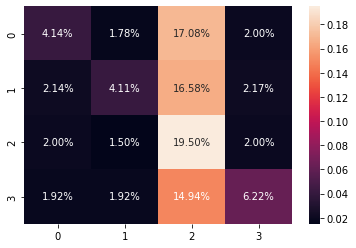

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_lg)
print(confusion_matrix(y_test, y_pred_lg))
#sns.heatmap(confusion_matrix(y_test, y_pred_lg), annot=True)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')

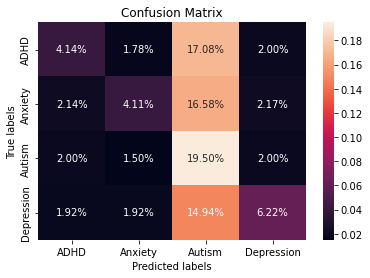

In [ ]:
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['ADHD','Anxiety', 'Autism', 'Depression']); ax.yaxis.set_ticklabels(['ADHD','Anxiety', 'Autism', 'Depression']);

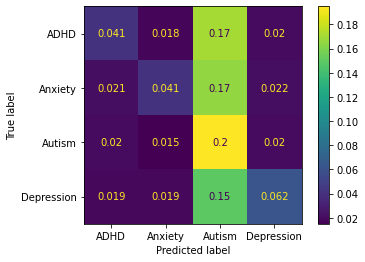

In [ ]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# cf_matrix = confusion_matrix(y_test, y_pred_lg)
# cmd = ConfusionMatrixDisplay(cf_matrix/np.sum(cf_matrix), display_labels=['ADHD','Anxiety', 'Autism', 'Depression'])
# cmd.plot()

## Logistics Regression Result
Unigram ---> 54% Bigram ---> 43% Trigram ---> 34%

## Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()

rf_model = rf.fit(X_train, y_train.values.ravel())

In [ ]:
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

        ADHD       0.40      0.15      0.22       900
     anxiety       0.43      0.16      0.24       900
      autism       0.28      0.78      0.42       900
  depression       0.49      0.24      0.32       900

    accuracy                           0.33      3600
   macro avg       0.40      0.33      0.30      3600
weighted avg       0.40      0.33      0.30      3600



[[139  61 622  78]
 [ 68 146 605  81]
 [ 62  65 702  71]
 [ 77  65 541 217]]


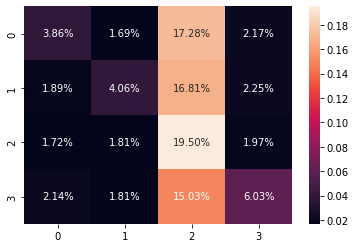

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_rf)
print(confusion_matrix(y_test, y_pred_rf))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')

# Random Forest Classifier Result
Unigram ---> 41%  Bigram ---> 40%  Trigram ---> 33%

## Hyperparameter Tunning for Random Forest Classifier

In [ ]:
# Using the GridSearch Cross validation method at 5-fold and hyper-parameter tuning of n_estimators and max_depth 
# to determine the best hyper-parameter settings that will produce the optimal performance for the RF classifier

def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))
        
        
rf_cv = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
}

cv = GridSearchCV(rf_cv, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': None, 'n_estimators': 50}

0.251 (+/-0.001) for {'max_depth': 2, 'n_estimators': 5}
0.256 (+/-0.003) for {'max_depth': 2, 'n_estimators': 50}
0.26 (+/-0.004) for {'max_depth': 2, 'n_estimators': 100}
0.254 (+/-0.002) for {'max_depth': 10, 'n_estimators': 5}
0.267 (+/-0.005) for {'max_depth': 10, 'n_estimators': 50}
0.278 (+/-0.01) for {'max_depth': 10, 'n_estimators': 100}
0.258 (+/-0.003) for {'max_depth': 20, 'n_estimators': 5}
0.283 (+/-0.005) for {'max_depth': 20, 'n_estimators': 50}
0.289 (+/-0.006) for {'max_depth': 20, 'n_estimators': 100}
0.312 (+/-0.008) for {'max_depth': None, 'n_estimators': 5}
0.321 (+/-0.005) for {'max_depth': None, 'n_estimators': 50}
0.321 (+/-0.008) for {'max_depth': None, 'n_estimators': 100}


In [ ]:
# Refit the three best hyper-parameter models on the full training set
# 0.312 (+/-0.008) for {'max_depth': None, 'n_estimators': 5}
# 0.321 (+/-0.005) for {'max_depth': None, 'n_estimators': 50}
# 0.321 (+/-0.008) for {'max_depth': None, 'n_estimators': 100}

rf1 = RandomForestClassifier(n_estimators=5, max_depth=None)
rf1.fit(X_train, y_train.values.ravel())

rf2 = RandomForestClassifier(n_estimators=50, max_depth=None)
rf2.fit(X_train, y_train.values.ravel())

rf3 = RandomForestClassifier(n_estimators=100, max_depth=None)
rf3.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [ ]:
rf1_pred = rf1.predict(X_test)
rf2_pred = rf2.predict(X_test)
rf3_pred = rf3.predict(X_test)

In [ ]:
print(classification_report(y_test, rf1_pred))
print(classification_report(y_test, rf2_pred))
print(classification_report(y_test, rf3_pred))

              precision    recall  f1-score   support

        ADHD       0.27      0.81      0.41       900
     anxiety       0.40      0.14      0.21       900
      autism       0.44      0.14      0.21       900
  depression       0.49      0.20      0.28       900

    accuracy                           0.32      3600
   macro avg       0.40      0.32      0.28      3600
weighted avg       0.40      0.32      0.28      3600

              precision    recall  f1-score   support

        ADHD       0.39      0.16      0.22       900
     anxiety       0.43      0.16      0.24       900
      autism       0.28      0.78      0.42       900
  depression       0.48      0.22      0.31       900

    accuracy                           0.33      3600
   macro avg       0.40      0.33      0.30      3600
weighted avg       0.40      0.33      0.30      3600

              precision    recall  f1-score   support

        ADHD       0.41      0.16      0.23       900
     anxiety       0.

# Result
rf3 gave the optimal prdiction having **n_estimators**=100, and **max_depth**=None

## Support Vector Machine  Pipeline

In [ ]:
svm = SVC()
svm_model = svm.fit(X_train, y_train.values.ravel())

# Prediction with Test data
y_pred_svm = svm_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

        ADHD       0.43      0.10      0.16       900
     anxiety       0.40      0.11      0.17       900
      autism       0.27      0.76      0.40       900
  depression       0.38      0.26      0.31       900

    accuracy                           0.31      3600
   macro avg       0.37      0.31      0.26      3600
weighted avg       0.37      0.31      0.26      3600



In [ ]:
confusion_matrix(y_test, y_pred_svm)

array([[ 86,  47, 649, 118],
       [ 41,  99, 629, 131],
       [ 36,  53, 688, 123],
       [ 37,  46, 586, 231]])

SVM Result
Unigram ---> 54% Bigram ---> 43% Trigram ---> 31%

## Naive Bayes Pipeline

In [ ]:
nb = MultinomialNB()
nb_model = nb.fit(X_train, y_train.values.ravel())

# Prediction with Test data
y_pred_nb = nb_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

        ADHD       0.28      0.77      0.41       900
     anxiety       0.44      0.17      0.25       900
      autism       0.45      0.16      0.23       900
  depression       0.52      0.25      0.34       900

    accuracy                           0.34      3600
   macro avg       0.42      0.34      0.31      3600
weighted avg       0.42      0.34      0.31      3600



In [ ]:
confusion_matrix(y_test, y_pred_nb)

array([[694,  70,  70,  66],
       [614, 155,  58,  73],
       [630,  62, 141,  67],
       [568,  68,  41, 223]])

Naive Bayes Result Unigram ---> 53% Bigram ---> 44% Trigram ---> 31%

## **Deep Learning Approach**

In [ ]:
#from keras.preprocessing.text import Tokenizer
#from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Embedding,CuDNNLSTM,Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Changing class labels to numeric for Recurrent Neural Network
mhsu_balanced.label[mhsu_balanced.label == 'ADHD'] = 1
mhsu_balanced.label[mhsu_balanced.label == 'anxiety'] = 2
mhsu_balanced.label[mhsu_balanced.label == 'autism'] = 3
mhsu_balanced.label[mhsu_balanced.label == 'depression'] = 4

In [ ]:
x = mhsu_balanced['clean_text']
#y = mhsu_balanced['label']
y = np.asarray(mhsu_balanced['label']).astype(np.float32)

In [ ]:
x

31579    trying join discord servers make new friends u...
32895    stop worrying thinking severe health anxiety o...
44954                                may gerd lol imma see
39341    want break contact nagging urge write text mes...
39009    grad school went years college never made clos...
                               ...                        
7650     ill go first proctor ingram whitechapel charli...
9889     developed fucking eating disorder im fucking t...
9266     hey may dumb question sudden got really itchy ...
7880     literally fucking kill gotten circle friends e...
7860     hypermobility getting bad stand anymore need s...
Name: clean_text, Length: 18000, dtype: object

In [ ]:
token = Tokenizer()
token.fit_on_texts(x)
seq = token.texts_to_sequences(x)

In [ ]:
pad_seq = pad_sequences(seq,maxlen=300)

In [ ]:
vocab_size = len(token.word_index)+1

In [ ]:
embedding_vector = {}
f = open('/content/drive/MyDrive/Mindsum/glove.840B.300d.txt')
for line in tqdm(f):
    value = line.split(' ')
    word = value[0]
    coef = np.array(value[1:],dtype = 'float32')
    embedding_vector[word] = coef

2196018it [02:21, 15566.18it/s]


In [ ]:
embedding_matrix = np.zeros((vocab_size,300))
for word,i in tqdm(token.word_index.items()):
    embedding_value = embedding_vector.get(word)
    if embedding_value is not None:
        embedding_matrix[i] = embedding_value

100%|██████████| 47409/47409 [00:00<00:00, 431520.70it/s]


In [ ]:
model = Sequential()
model.add(Embedding(vocab_size,300,weights = [embedding_matrix],input_length=300,trainable = False))
model.add(Bidirectional(LSTM(32, dropout= 0, recurrent_dropout=0)))
#model.add(LSTM(32, dropout= 0, recurrent_dropout=0))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics = ['accuracy'])
history = model.fit(pad_seq,y,epochs = 10,batch_size=256,validation_split=0.2)

Epoch 1/10
57/57 [==============================] - 6s 51ms/step - loss: 0.0000e+00 - accuracy: 0.3107 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
57/57 [==============================] - 2s 35ms/step - loss: 0.0000e+00 - accuracy: 0.3125 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/10
57/57 [==============================] - 2s 36ms/step - loss: 0.0000e+00 - accuracy: 0.3125 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/10
57/57 [==============================] - 2s 35ms/step - loss: 0.0000e+00 - accuracy: 0.3125 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/10
57/57 [==============================] - 2s 35ms/step - loss: 0.0000e+00 - accuracy: 0.3125 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/10
57/57 [==============================] - 2s 35ms/step - loss: 0.0000e+00 - accuracy: 0.3125 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/10
57/57 [==============================] - 2s 35ms/step - loss: 0.0000e+0

RNN for 4500 posts
Accuracy ---> 31.25%

## **Ensemble Building**



In [ ]:
from nltk.metrics.scores import accuracy
import time
bag_model = BaggingClassifier()

start = time.ctime()

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
score = cross_val_score(bag_model, X_train, y_train, scoring="accuracy", cv=cv, n_jobs=-1)
print(f"Mean Accuracy: {np.mean(score):.3f}\nRun time:{(time() - start): .3f}s")




In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 0)
# fitting the model
tree = tree.fit(X_train, y_train)
# Predicting the training set
y_train_pred = tree.predict(X_train)
# Predicting the test set
y_test_pred = tree.predict(X_test)


print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))


0.5302777777777777
0.3175


In [ ]:
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

        ADHD       0.83      0.39      0.53      3600
     anxiety       0.90      0.37      0.52      3600
      autism       0.35      0.96      0.52      3600
  depression       0.98      0.40      0.57      3600

    accuracy                           0.53     14400
   macro avg       0.77      0.53      0.54     14400
weighted avg       0.77      0.53      0.54     14400

              precision    recall  f1-score   support

        ADHD       0.39      0.14      0.21       900
     anxiety       0.42      0.13      0.20       900
      autism       0.28      0.81      0.41       900
  depression       0.48      0.18      0.27       900

    accuracy                           0.32      3600
   macro avg       0.39      0.32      0.27      3600
weighted avg       0.39      0.32      0.27      3600



In [ ]:
BaggingClassifier().get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag_model = BaggingClassifier(
          base_estimator=LogisticRegression (),
          n_estimators=100,
          random_state=0)
bag_model.fit(X_train, y_train.values.ravel())

# Predicting the test set
y_test_bag = bag_model.predict(X_test)

classification_report(y_test, y_test_bag)

In [ ]:
print(classification_report(y_test, y_test_bag))

              precision    recall  f1-score   support

        ADHD       0.41      0.16      0.23       900
     anxiety       0.43      0.16      0.24       900
      autism       0.29      0.78      0.42       900
  depression       0.51      0.25      0.33       900

    accuracy                           0.34      3600
   macro avg       0.41      0.34      0.31      3600
weighted avg       0.41      0.34      0.31      3600



In [ ]:
confusion_matrix(y_test, y_test_bag)

array([[148,  64, 620,  68],
       [ 78, 148, 597,  77],
       [ 70,  60, 701,  69],
       [ 69,  70, 537, 224]])

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
          base_estimator=nb_model,
          n_estimators=100,
          random_state=0)

bag_model.fit(X_train, y_train.values.ravel())

# Predicting the training set
y_train_bag = bag_model.predict(X_train)
# Predicting the test set
y_test_bag = bag_model.predict(X_test)

accuracy_score(y_train, y_train_bag)
accuracy_score(y_test, y_test_bag)

0.33611111111111114

In [ ]:
print(classification_report(y_test, y_test_bag))

              precision    recall  f1-score   support

        ADHD       0.28      0.77      0.41       900
     anxiety       0.43      0.17      0.24       900
      autism       0.46      0.16      0.24       900
  depression       0.52      0.25      0.33       900

    accuracy                           0.34      3600
   macro avg       0.42      0.34      0.31      3600
weighted avg       0.42      0.34      0.31      3600



In [ ]:
confusion_matrix(y_test, y_test_bag)

array([[691,  68,  71,  70],
       [615, 150,  58,  77],
       [627,  64, 146,  63],
       [566,  69,  42, 223]])

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
          base_estimator=rf_model,
          n_estimators=100,
          random_state=0)

bag_model.fit(X_train, y_train.values.ravel())

# Predicting the training set
y_train_bag = bag_model.predict(X_train)
# Predicting the test set
y_test_bag = bag_model.predict(X_test)

accuracy_score(y_train, y_train_bag)
accuracy_score(y_test, y_test_bag)

0.3386111111111111

In [ ]:
print(classification_report(y_test, y_test_bag))

              precision    recall  f1-score   support

        ADHD       0.40      0.16      0.23       900
     anxiety       0.44      0.16      0.24       900
      autism       0.29      0.79      0.42       900
  depression       0.50      0.24      0.33       900

    accuracy                           0.34      3600
   macro avg       0.41      0.34      0.30      3600
weighted avg       0.41      0.34      0.30      3600

